# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

Define our question, understanding the Datasets, Data preprocessing, EDA, model the data, compare various ML algorithms, and finally selecting one model and improving it.

People saw the model, then used (both are counted as interactions), the question is which one is the pirority? Increase exposure or increase spending? (the business cost and return to increase exposure vs. the business return and cost to increase spending)

Questions I want to ask are:
- How do people responde to the offer on average
- Any difference if we divide by gender/age/income vs. offer given channel/duration/values 

multiclass classification

# 1. Inspect the Dataset:

In [1]:
import pandas as pd
import numpy as np
import math
import json

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
profile.sample(5)

,gender,age,id,became_member_on,income
9178,F,83,6c0f89d1092545bbb522281d8337dd2b,20161007,69000.0
2179,M,23,adee4e7b7dfd4661bd0faa61ed3ad33b,20171028,32000.0
10201,F,53,40ce68d83c7b4edc95b47317fb4b6e70,20180718,39000.0
8509,None,118,8b2f2e39490040d5b8b5632ed9cc849d,20180224,NaN
14914,M,18,3fc54fb18cd94422bd02b5550002535b,20180310,40000.0


In [3]:
transcript.sample(5)

,person,event,value,time
44491,26a2ab820a234213818a1a15e15eafee,transaction,{'amount': 28.24},114
65065,2651464d36074e03b8b24dde90574381,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},168
282327,d7e2dea9ed9440f6bde9e791a3c89cbb,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,624
163272,1593d617fac246ef8e50dbb0ffd77f5f,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},408
113417,51031b000489411c834ff3c2b088faf0,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},336


In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


To do any analysis, we will need to combine the 3 dataset. We will clean the profile and transcript dataset first, and merge combine them. Then we will combine it with portfolio. Let's start with cleaning the profile dataset.

## 2. Cleaning the Datasets

### 2.1: Profile and Transcript Datasets

In [5]:
profile.info() #inspect the datatype and null vlaues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


* gender and income - has the same amount of null values
* became_member_on - not in datatime format

In [6]:
profile.describe() #inspect the values

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


* age - max value is 118

In [7]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


* value - needs to be seperated by offer_id and amount

In [8]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


* time - in hours, will be easier to see if change to days.

In [9]:
#merge the two dataset
df = transcript.merge(profile, left_on='person', right_on='id', how='outer')

In [10]:
#let's look at the null values first
null_profile = df[df['gender'].isnull()]

null_profile.sample(5)

,person,event,value,time,gender,age,id,became_member_on,income
203027,8e96eadadb8c46bebc04f2697f4367fa,transaction,{'amount': 9.8},450,None,118,8e96eadadb8c46bebc04f2697f4367fa,20171023,NaN
116192,763fec6028f044a0ad4d5864b32cef46,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},504,None,118,763fec6028f044a0ad4d5864b32cef46,20171104,NaN
274356,2d2dfdca54a04c69832279c0161623cf,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},336,None,118,2d2dfdca54a04c69832279c0161623cf,20170728,NaN
238972,6622080e3f134a41b6c5c869b634042b,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576,None,118,6622080e3f134a41b6c5c869b634042b,20180707,NaN
269080,c5ecd92a7d1f442fb098df6d6ab8a3e5,transaction,{'amount': 1.8900000000000001},582,None,118,c5ecd92a7d1f442fb098df6d6ab8a3e5,20160429,NaN


In [11]:
#confirm if null values in gender == null in income
null_profile['income'].mean()

nan

In [12]:
#confirm if all null values has age == 118
null_profile['age'].mean()

118.0

In [13]:
#do null profiles ever completed any offers?
null_profile['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [14]:
#null profile offer completion rate
len(null_profile[null_profile['event']=='offer completed'])/len(null_profile[null_profile['event']=='offer received'])

0.11610065466448445

In [15]:
#complete profile offer completion rate
com_profile = df[df['gender'].notnull()]

len(com_profile[com_profile['event']=='offer completed'])/len(com_profile[com_profile['event']=='offer received'])

0.4878723628216117

### Insight 1: If a customer has an incomplete profile, for example, with missing gender or age, the chance of that customer participating in an offer is significantly lower.

Due to the incomplete information and they are significantly less likely to use our offer. I decided to drop them for now. However, I did make the assumption that they are likely to spend less money as well due to the low degree of participation/invovlement, without analysising the amount of transaction that they made.

### 2.1.1: Round 1 - correct data types and formats

In [16]:
def clean_df(df):
    clean_df = df[df['gender'].notnull()].copy() #drop null values
    clean_df.drop('id', axis=1, inplace=True) #drop the repeated column after combine
    
    #change became_member_on to datetime formate
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    # create a new column that has the year which customers become members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])
    
    #change the time in hours to days, rounding up
    clean_df['days'] = clean_df['time'].apply(lambda x: int(x / 24) + (x % 24 > 0))
    
    #clean the value column
    clean_df['offer_id'] = clean_df['value'].apply(lambda x: x['offer id'] if 'offer id' in x else x['offer_id'] if 'offer_id' in x else np.nan)
    clean_df['amount'] = clean_df['value'].apply(lambda x: x.get('amount', 0))
    clean_df.drop(['value'], axis=1, inplace=True)
    
    clean_df = clean_df.reset_index(drop=True)
    
    return clean_df
    

In [17]:
clean_df = clean_df(df)
clean_df.head()

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,F,75,2017-05-09,100000.0,2017,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,F,75,2017-05-09,100000.0,2017,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,F,75,2017-05-09,100000.0,2017,6,NaN,19.89
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,F,75,2017-05-09,100000.0,2017,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,F,75,2017-05-09,100000.0,2017,6,NaN,17.78


### 2.2 Portfolio Dataset

In [18]:
portfolio['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

In [19]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


* channel - in a list, make them very hard to analyze
* no null values - good

In [20]:
#merge the three datasets
full_df = clean_df.merge(portfolio, left_on='offer_id', right_on='id', how='outer')
full_df.drop(['id'], axis=1, inplace=True) #drop the repeated column
full_df.sample(5)

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,amount,reward,channels,difficulty,duration,offer_type
125936,c5f6cfb26f7e405f8403da6575eceadd,transaction,504,F,37,2017-12-19,46000.0,2017,21,NaN,7.58,NaN,NaN,NaN,NaN,NaN
247500,b99a3a0c26e2406fa5d249d20a6b1911,offer received,336,M,72,2018-07-04,84000.0,2018,14,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,5.0,"[web, email]",20.0,10.0,discount
37933,15ab73bf4cc4467db865911592678b38,transaction,246,F,72,2013-08-14,60000.0,2013,11,NaN,10.00,NaN,NaN,NaN,NaN,NaN
222721,d660d99086664c348480011c5c013529,offer completed,366,F,61,2018-03-08,31000.0,2018,16,fafdcd668e3743c1bb461111dcafc2a4,0.00,2.0,"[web, email, mobile, social]",10.0,10.0,discount
191357,96be04f29ab44645a3face77bfb50653,offer received,504,F,62,2017-09-25,110000.0,2017,21,2906b810c7d4411798c6938adc9daaa5,0.00,2.0,"[web, email, mobile]",10.0,7.0,discount


In [21]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            272762 non-null  object        
 1   event             272762 non-null  object        
 2   time              272762 non-null  int64         
 3   gender            272762 non-null  object        
 4   age               272762 non-null  int64         
 5   became_member_on  272762 non-null  datetime64[ns]
 6   income            272762 non-null  float64       
 7   year              272762 non-null  object        
 8   days              272762 non-null  int64         
 9   offer_id          148805 non-null  object        
 10  amount            272762 non-null  float64       
 11  reward            148805 non-null  float64       
 12  channels          148805 non-null  object        
 13  difficulty        148805 non-null  float64       
 14  dura

### 2.3 full dataset

### 2.3.1: Round 2 - turn categorical data to numerical for analysis

* event - 
    - 0-'offer received'
    - 1-'offer viewed'
    - 2-'offer completed'
    - 3-'transaction'
* gender - 
    - 0-F
    - 1-M
    - 3-O
* channels -                      
    - 0-[web, email]
    - 1-[email, mobile, social] 
    - 2-[web, email, mobile]
    - 3-[web, email, mobile, social]
* offer_type - 
    - 0-'bogo'
    - 2-'informational'
    - 3-'discount'
* year -
    - 0-'2013'
    - 1-'2014'
    - 2-'2015'
    - 3-'2016'
    - 4-'2017'
    - 5-'2018'
   

In [22]:
print((full_df['offer_type'].unique()), (full_df['event'].unique()), full_df['gender'].unique(), full_df['year'].unique())

['bogo' nan 'informational' 'discount'] ['offer received' 'offer viewed' 'offer completed' 'transaction'] ['F' 'M' 'O'] ['2017' '2018' '2015' '2016' '2014' '2013']


In [23]:
def cate2num(df, cols):
    """
    input: 
    df: the dataframe
    cols: a list of cols that are categorical variabls and want to turn into integers. However order does not matter
    for these categorical variables.
    
    output:
    dataframe with old columns + additional columns that turned categorial variables into numbers.
    The numbers only indicates different categories, not orders.
    """
    for col in cols:
        #get all the unique categories in the column
        array = df[col].unique()
        
        #get the numbers of categories
        value_nums = len(array)
        
        #create new column
        df[col+'_id'] = df[col]

        for i in range(value_nums):
            #replace the variable with a number in the newly created column
            df[col+'_id'] = np.where(df[col]==array[i] , i, df[col+'_id'])
    
    return df


In [24]:
def clean_allcat(df):
    """
    output:
    a dataframe with all orginal columns + new columns that turned the following categorical columns into
    numerical values.
    
    columns are ['gender', 'event', 'offer_type', 'year', channels']
    
    """
    #normal cat variables to numbers
    cols = ['gender', 'event', 'offer_type']
    cleaned_df = cate2num(df, cols)
    
    #years
    years = df['year'].unique()
    year_sorted = sorted([int(x) for x in list(years)])
    cleaned_df['year_id'] = df['year']
    for i in range(len(year_sorted)):
        cleaned_df['year_id'] = np.where(cleaned_df['year_id']==str(year_sorted[i]) , i, cleaned_df['year_id'])

    #channelId
    col = 'channels'
    channelTye_id = df[col].copy()
    length = len(df)
    
    for x in range(length):
        if df[col][x] == ['web', 'email', 'mobile', 'social']:
            channelTye_id[x] = 3
        elif df[col][x] == ['web', 'email', 'mobile']:
            channelTye_id[x] = 2
        elif df[col][x] == ['email', 'mobile', 'social']:
            channelTye_id[x] = 1
        elif df[col][x] == ['web', 'email']:
            channelTye_id[x] = 0
            
    cleaned_df['channelTye_id'] = channelTye_id

    return cleaned_df


In [25]:
full_clean = clean_allcat(full_df)

full_clean.sample(5)

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,...,reward,channels,difficulty,duration,offer_type,gender_id,event_id,offer_type_id,year_id,channelTye_id
196218,02c89861ce2c4010bf4ed63f6f6d5df3,offer completed,576,M,58,2016-03-16,79000.0,2016,24,2906b810c7d4411798c6938adc9daaa5,...,2.0,"[web, email, mobile]",10.0,7.0,discount,1,2,3,3,2
247482,2ef3df712274436380108e1227506fcd,offer received,576,M,60,2018-03-02,47000.0,2018,24,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,5.0,"[web, email]",20.0,10.0,discount,1,0,3,5,0
215928,ef14b3dc52ab4023857d5d20853eb5b8,offer viewed,678,F,48,2017-09-21,97000.0,2017,29,fafdcd668e3743c1bb461111dcafc2a4,...,2.0,"[web, email, mobile, social]",10.0,10.0,discount,0,1,3,4,3
261247,441d7217bbd24a3a8ff178ff33fc09a6,offer completed,594,F,52,2017-12-23,89000.0,2017,25,4d5c57ea9a6940dd891ad53e9dbe8da0,...,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,0,2,0,4,3
62861,3c5e22dca5164b0ca1203e2ba2a31ca7,transaction,636,M,35,2014-10-26,35000.0,2014,27,NaN,...,NaN,NaN,NaN,NaN,NaN,1,3,NaN,1,NaN


### 2.3.2: Round 3 - seperate into different datasets

In [26]:
#df with only offer records
offer_df = full_clean[full_clean['offer_id'].notnull()]

#df with only bogo and discount offer type
offer0_3 = full_clean.loc[(full_clean['offer_type_id']==0) | (full_clean['offer_type_id']==3)]

In [27]:
offer_df.sample(5)

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,...,reward,channels,difficulty,duration,offer_type,gender_id,event_id,offer_type_id,year_id,channelTye_id
193834,5a1fba0d6d0e4cb183abc82b4ed586df,offer received,504,M,57,2017-01-16,33000.0,2017,21,2906b810c7d4411798c6938adc9daaa5,...,2.0,"[web, email, mobile]",10.0,7.0,discount,1,0,3,4,2
172875,b23f03652b9f475eada633abb8d4eb67,offer viewed,456,F,47,2016-04-30,59000.0,2016,19,f19421c1d4aa40978ebb69ca19b0e20d,...,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,0,1,0,3,3
6395,7da713655c874687a7faec49bb938e44,offer received,168,M,66,2016-07-04,73000.0,2016,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,5.0,"[web, email, mobile]",5.0,7.0,bogo,1,0,0,3,2
1075,ed67dd8bc29b455ab00407fa2500b7d6,offer viewed,30,M,32,2015-05-01,47000.0,2015,2,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,5.0,"[web, email, mobile]",5.0,7.0,bogo,1,1,0,2,2
265200,bf5783772fee4f2ab126f07bf3be80f1,offer completed,0,F,29,2016-10-21,60000.0,2016,0,4d5c57ea9a6940dd891ad53e9dbe8da0,...,10.0,"[web, email, mobile, social]",10.0,5.0,bogo,0,2,0,3,3


In [28]:
offer0_3.sample(5)

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,...,reward,channels,difficulty,duration,offer_type,gender_id,event_id,offer_type_id,year_id,channelTye_id
223477,c79efd8eaae54659bd175e856b038474,offer completed,414,F,47,2016-05-15,48000.0,2016,18,fafdcd668e3743c1bb461111dcafc2a4,...,2.0,"[web, email, mobile, social]",10.0,10.0,discount,0,2,3,3,3
152631,4438fece00ed4f1a8b108c3cd85b19c1,offer received,168,M,53,2015-10-30,74000.0,2015,7,ae264e3637204a6fb9bb56bc8210ddfd,...,10.0,"[email, mobile, social]",10.0,7.0,bogo,1,0,0,2,1
232912,cbdd0e50d9e24b60a9ff67444a2ff7ef,offer viewed,444,M,26,2015-06-07,72000.0,2015,19,2298d6c36e964ae4a3e7e9706d1fb8c2,...,3.0,"[web, email, mobile, social]",7.0,7.0,discount,1,1,3,2,3
2921,767cbf2cf50f462782d60d411f6c4e4c,offer received,336,F,66,2018-01-05,78000.0,2018,14,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,5.0,"[web, email, mobile]",5.0,7.0,bogo,0,0,0,5,2
223716,6ed0fdde1b3644159eb78309c347e4c8,offer viewed,192,M,67,2018-01-11,39000.0,2018,8,fafdcd668e3743c1bb461111dcafc2a4,...,2.0,"[web, email, mobile, social]",10.0,10.0,discount,1,1,3,5,3


### 3. EDA

**Goal: to identify the ways that can adovid giving offers that were used WITHOUT being viewed.**

Questions:
- Q1: Which one is the most popular offer?
- Q2: Do different groups of people react different to offers?
- Q3: Do people generally view and then use the offer? or they use the offer without notice it?
- Q4: Which group of people is more likely to use the offer or make a purchase WITHOUT viewing the offer, if there is such a group?
- Q5: Which type of offer is more likely to be used WITHOUT being viewed, if there is one?

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

### Q1: which one is the most popular offer?

Text(0.5, 1.0, 'Totoal counts of 0-BOGO offer vs. 3-discount offer\n')

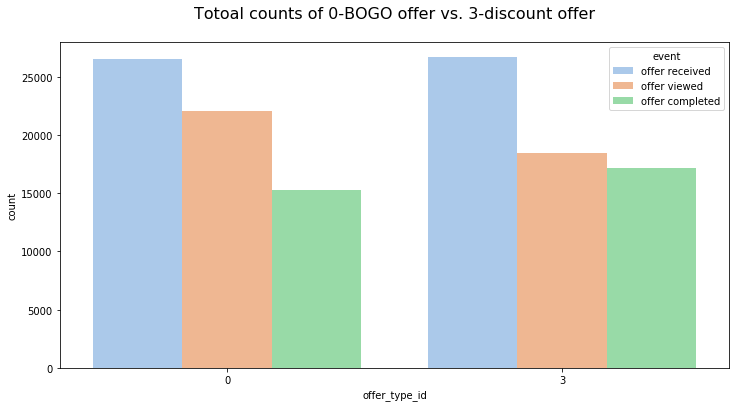

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="offer_type_id", hue="event", data=offer0_3, palette="pastel")
plt.title("Totoal counts of 0-BOGO offer vs. 3-discount offer\n", fontsize=16)

In [31]:
#offer0_3.groupby(['offer_id'])['days'].mean()
#offer0_3.groupby(['offer_id'])['days'].min()
#offer0_3.groupby(['offer_id'])['days'].max()

In [32]:
#dataframe with only bogo offer
bogo = offer0_3[offer0_3['offer_type_id']==0]
#dataframe with only discount offer
discount = offer0_3[offer0_3['offer_type_id']==3]

def event_counts(df):
    """
    output:
    returns the counts of each individual event
    
    for example:
    There are 3 different events in this dataset - offer completed/viewed/received.
    The result will return 3 numbers that are the total counts of each of these events.
    """
    events = df['event_id'].unique()
    counts = []
    for event in events:
        count = len(df[df['event_id'] == event])
        yield count
    

In [33]:
#event counts of BOGO offer
bogo0, bogo1, bogo2 = event_counts(bogo)

#event counts of discount offer
discount0, discount1, discount2 = event_counts(discount)

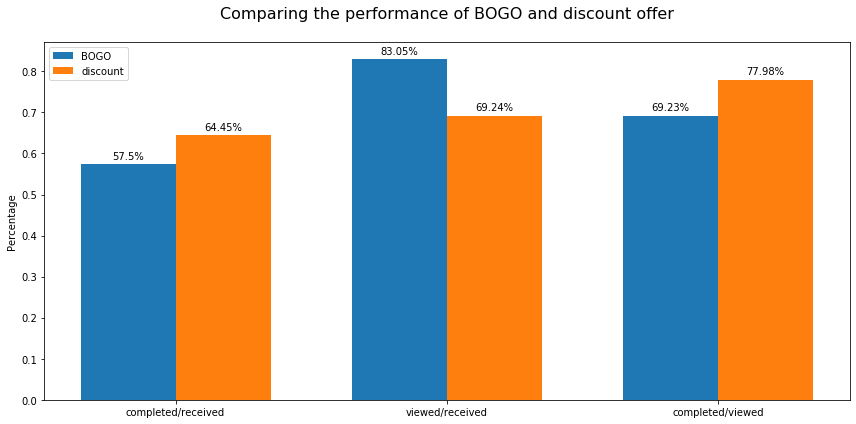

In [34]:
"""
BOGO and discount offers' performances in terms of percentage
"""

labels = ['completed/received', 'viewed/received', 'completed/viewed']
bogo_performance = [bogo2/bogo0, bogo1/bogo0, bogo2/bogo1]
discount_performance = [discount2/discount0, discount1/discount0, discount2/bogo1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, bogo_performance, width, label='BOGO')
rects2 = ax.bar(x + width/2, discount_performance, width, label='discount')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Comparing the performance of BOGO and discount offer\n', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Insight 2: 

### Q2: Do different groups of people react different to offers?

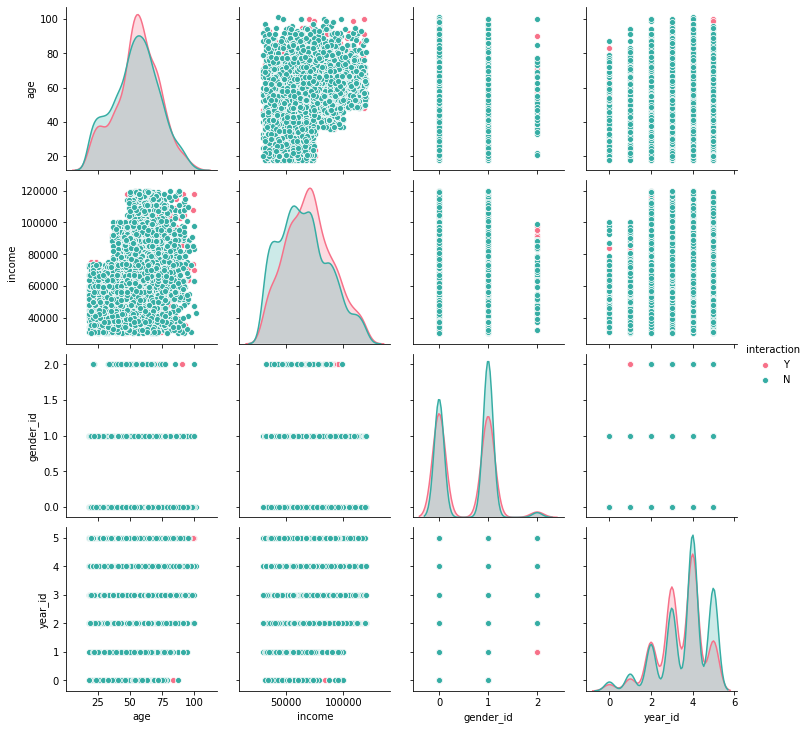

In [47]:
#used 3% of the dataset, otherwise it will take too much time to graph it
df_bogo = bogo.sample(5000).copy()
df_bogo["interaction"] = np.where(df_bogo["event_id"] == 2, "Y", "N")
df_bogo2 = df_bogo[["interaction", "age", "income", "gender_id", "year_id"]]

sns.pairplot(df_bogo2, hue="interaction", palette="husl")

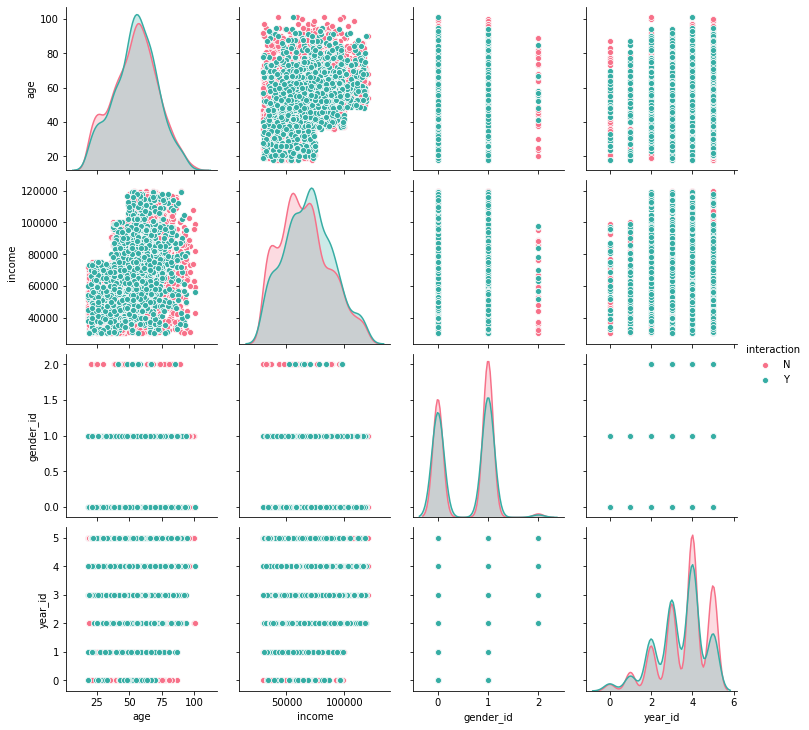

In [48]:
df_discount = discount.sample(5000).copy()
df_discount["interaction"] = np.where(df_discount["event_id"] == 2, "Y", "N")
df_discount2 = df_discount[["interaction", "age", "income", "gender_id", "year_id"]]

sns.pairplot(df_discount2, hue="interaction", palette="husl")

### Q3: Do people view and then use the offer? or they use the offer without notice it?

In [35]:
offer0_3['interacted'] = 1

user_item = offer0_3.groupby(['person', 'days','event'])['interacted'].max().unstack(fill_value=0)

<ipython-input-35-25f761bdf43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer0_3['interacted'] = 1


Text(0, 0.5, 'count')

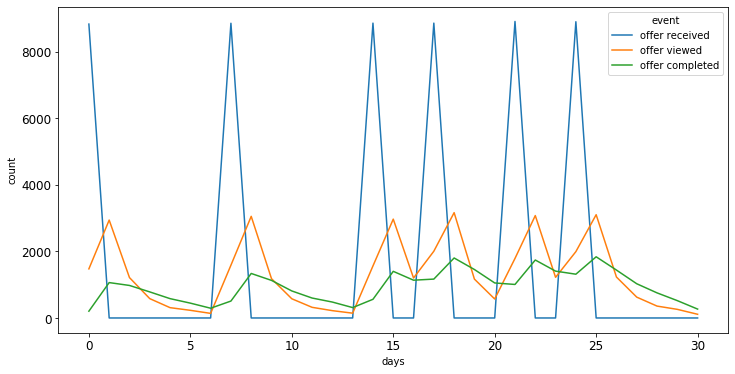

In [36]:
events = list(offer0_3['event'].unique())
ax = user_item.groupby('days')[events].sum().plot(figsize=(12,6), fontsize=12)
ax.set_xlabel = ('days')
ax.set_ylabel("count")

- The peak of offer viewed and ofer completed sync betteras time goes by. The first and second time, the peak of completed was before the peak of viewed 
- offers are effective in stmulating spending 
- the gap between "offer completed" and "offer viewed" does decrese as time goes by

In [ ]:
def piechart(df, col, labels=labels, title=title):
    sections = df[col].unique()
    sizes = []
    for n in sections:
        sizes.append(len(df[df[col]==n]))

    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')

    plt.title(title)

    plt.show()   

### Q4: which group of people is easier to use the offer/make a purchase without viewing the offer, if there is such a group?

In [37]:
#select the first 2 interactions a person had with an offer
time_0 = offer0_3.sort_values('time').groupby(['person', 'offer_id']).tail(2)
time_0.head()

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,...,channels,difficulty,duration,offer_type,gender_id,event_id,offer_type_id,year_id,channelTye_id,interacted
173437,08a5adf50a9b40a9b5bb24019d0a55fc,offer received,0,M,81,2018-06-21,74000.0,2018,0,f19421c1d4aa40978ebb69ca19b0e20d,...,"[web, email, mobile, social]",5.0,5.0,bogo,1,0,0,5,3,1
248331,55b7b860b3f14ff1bb7e317532de78d0,offer received,0,M,19,2018-02-09,49000.0,2018,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"[web, email]",20.0,10.0,discount,1,0,3,5,0,1
151457,b8c17e6e004746a4800eeac73461b1dd,offer received,0,M,63,2017-08-04,96000.0,2017,0,ae264e3637204a6fb9bb56bc8210ddfd,...,"[email, mobile, social]",10.0,7.0,bogo,1,0,0,4,1,1
248316,f9c27f6e2fe2441e97db37db2ba3cc17,offer received,0,M,59,2017-10-28,50000.0,2017,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"[web, email]",20.0,10.0,discount,1,0,3,4,0,1
173451,ab68c87257344ba7963064dd8b4b9350,offer received,0,M,68,2017-10-09,33000.0,2017,0,f19421c1d4aa40978ebb69ca19b0e20d,...,"[web, email, mobile, social]",5.0,5.0,bogo,1,0,0,4,3,1


In [38]:
#demonstration of the dataset for 1 user
time_0[time_0['person'] == '08a5adf50a9b40a9b5bb24019d0a55fc']

,person,event,time,gender,age,became_member_on,income,year,days,offer_id,...,channels,difficulty,duration,offer_type,gender_id,event_id,offer_type_id,year_id,channelTye_id,interacted
173437,08a5adf50a9b40a9b5bb24019d0a55fc,offer received,0,M,81,2018-06-21,74000.0,2018,0,f19421c1d4aa40978ebb69ca19b0e20d,...,"[web, email, mobile, social]",5.0,5.0,bogo,1,0,0,5,3,1
173438,08a5adf50a9b40a9b5bb24019d0a55fc,offer viewed,84,M,81,2018-06-21,74000.0,2018,4,f19421c1d4aa40978ebb69ca19b0e20d,...,"[web, email, mobile, social]",5.0,5.0,bogo,1,1,0,5,3,1
189328,08a5adf50a9b40a9b5bb24019d0a55fc,offer received,336,M,81,2018-06-21,74000.0,2018,14,2906b810c7d4411798c6938adc9daaa5,...,"[web, email, mobile]",10.0,7.0,discount,1,0,3,5,2,1
215092,08a5adf50a9b40a9b5bb24019d0a55fc,offer viewed,408,M,81,2018-06-21,74000.0,2018,17,fafdcd668e3743c1bb461111dcafc2a4,...,"[web, email, mobile, social]",10.0,10.0,discount,1,1,3,5,3,1
189329,08a5adf50a9b40a9b5bb24019d0a55fc,offer completed,414,M,81,2018-06-21,74000.0,2018,18,2906b810c7d4411798c6938adc9daaa5,...,"[web, email, mobile]",10.0,7.0,discount,1,2,3,5,2,1
215093,08a5adf50a9b40a9b5bb24019d0a55fc,offer completed,414,M,81,2018-06-21,74000.0,2018,18,fafdcd668e3743c1bb461111dcafc2a4,...,"[web, email, mobile, social]",10.0,10.0,discount,1,2,3,5,3,1
233037,08a5adf50a9b40a9b5bb24019d0a55fc,offer viewed,600,M,81,2018-06-21,74000.0,2018,25,2298d6c36e964ae4a3e7e9706d1fb8c2,...,"[web, email, mobile, social]",7.0,7.0,discount,1,1,3,5,3,1
233038,08a5adf50a9b40a9b5bb24019d0a55fc,offer completed,642,M,81,2018-06-21,74000.0,2018,27,2298d6c36e964ae4a3e7e9706d1fb8c2,...,"[web, email, mobile, social]",7.0,7.0,discount,1,2,3,5,3,1


In [39]:
#dataset with users first interaction
#first_event= time_0.sort_values('time').groupby(['person', 'offer_id']).min()
#first_event.to_pickle("./firstEvent.pkl")

In [42]:
#dataset with users second interaction
second_event= time_0.sort_values('time').groupby(['person', 'offer_id']).max()
second_event.to_pickle("./secondEvent.pkl")

In [43]:
first_event = pd.read_pickle("./firstEvent.pkl")
second_event= pd.read_pickle("./secondEvent.pkl")

In [44]:
#we only want to examine the users who received an offer and compelted it without viewing
event1 = first_event[first_event['event']=='offer received']
event2 = second_event[second_event['event']=='offer completed']

#a list of [person, offer id] whose first intereaction with the offer was 'offer received'
lst1 = []

#a list of [person, offer id] whose second intereaction with the offer was 'offer completed'
lst2 = [] 

for x in range(len(event1)):
    person = event1.index[x]
    lst1.append(person)

for y in range(len(event2)):
    person = event2.index[y]
    lst2.append(person)

print(lst1[0], lst2[0])

('0020c2b971eb4e9188eac86d93036a77', 'ae264e3637204a6fb9bb56bc8210ddfd') ('01925607d99c460996c281f17cdbb9e2', '4d5c57ea9a6940dd891ad53e9dbe8da0')


In [45]:
from collections import Counter

In [46]:
#take out only the person ids
person1 = [lst1[x][0] for x in range(len(lst1))]
person2 = [lst2[x][0] for x in range(len(lst2))]

#found the people that exist in both lists
c = Counter(person1) & Counter(person2)
#a list of people whom completed an offer without viewing it
person_list = list(c.keys())

In [49]:
#we want to study these people. Therefore, we label them in the profile dataset
profile['problem'] = np.where(profile.id.isin(person_list), 1, 0)

profile.sample(5)

,gender,age,id,became_member_on,income,problem
13679,F,56,95f37a4a6f8b4bf6b9f91d62db4457dc,20130818,38000.0,1
11311,M,44,791a4a295d1744baa879d9c3be42255e,20160613,99000.0,0
10191,F,64,a6c6bc7bbbaa46f4a7c36d036cf537b2,20180117,76000.0,0
8075,M,66,e6a59f1d7d9d4f49a37c1c17d6cb7870,20180127,46000.0,0
16862,M,45,52653083249447be81b2d37a79d7f003,20170502,46000.0,0


In [51]:
def clean_profile(df):
    clean_df = df[df['gender'].notnull()].copy() #drop null values
    clean_df.drop('id', axis=1, inplace=True) #drop the repeated column after combine
    
    #change became_member_on to datetime formate
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    # create a new column that has the year which customers become members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])

    return clean_df
    

clean_profile = clean_profile(profile)
clean_profile.head()

,gender,age,became_member_on,income,problem,year
1,F,55,2017-07-15,112000.0,0,2017
3,F,75,2017-05-09,100000.0,0,2017
5,M,68,2018-04-26,70000.0,0,2018
8,M,65,2018-02-09,53000.0,0,2018
12,M,58,2017-11-11,51000.0,0,2017


In [71]:
def boxplots(df, variables, hue, n_rows=None, n_cols=None):
    '''Draw boxplots to examine the churn behavior of each continuous variable. 

    Args:
    variables: list. A list of variables that you would like to examine
    n_rows, n_cols: int. 
    hue: Because the context here is a churn analysis, so I set the default to "Churn". 
    
    Returns:
    boxplots of all the variables that were passed in the format of that you specify. 
    '''
    fig=plt.figure(figsize=(12,6))
    sns.set(palette='pastel')
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df, ax=ax).set_title(var)
    plt.show()

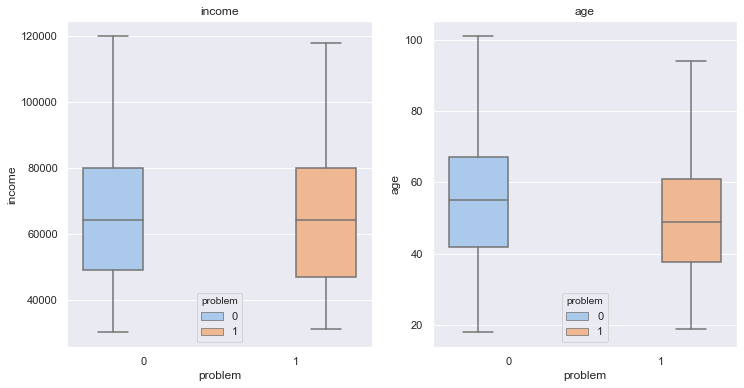

In [72]:
var=['income', 'age']
boxplots(df=clean_profile, variables=var, hue="problem", n_rows=1, n_cols=2,)

In [81]:
problem_df = clean_profile[clean_profile['problem']==1]
no_problem = clean_profile[clean_profile['problem']==0]

Text(0, 1.0, 'Comparing the propotion of joining year b/w the problematic profiles and the rest\n')

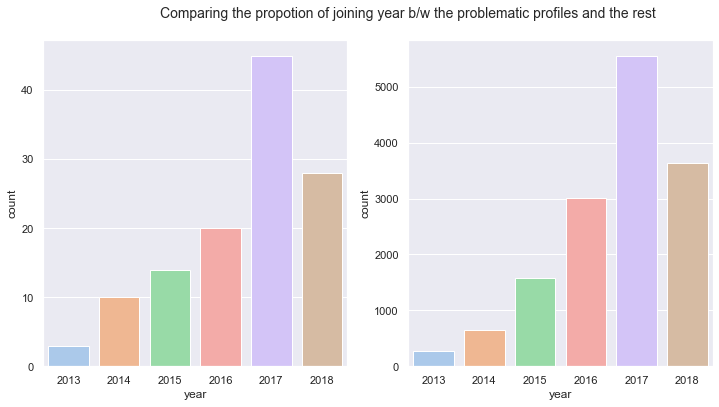

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x="year", data=problem_df, palette="pastel", ax=ax[0])
sns.countplot(x="year", data=no_problem, palette="pastel", ax=ax[1])
plt.title("""Comparing the propotion of joining year b/w the problematic profiles and the rest\n""", x=0, fontsize=14)

Text(0, 1.0, 'Comparing the propotion of genders b/w the problematic profiles and the rest\n')

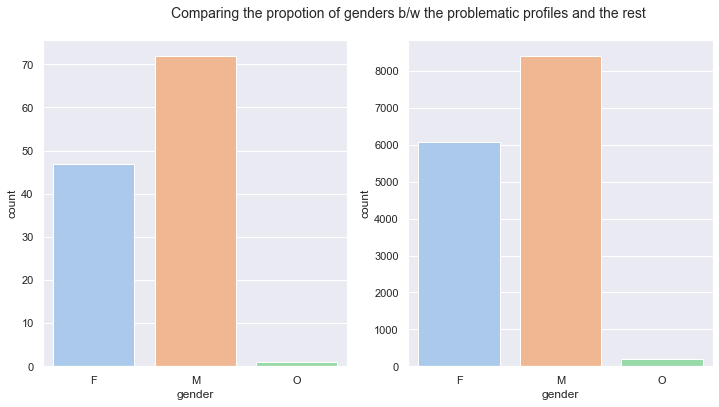

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x="gender", data=problem_df, palette="pastel", ax=ax[0])
sns.countplot(x="gender", data=no_problem, palette="pastel", ax=ax[1])
plt.title("Comparing the propotion of genders b/w the problematic profiles and the rest\n", x=0, fontsize=14)

### Q5: Which type of offer is easier to be used without even noticing by the user, if there is one?

In [90]:
#offer ids of the first user-offer interactions that were 'offer received'
offer1 = [lst1[x][1] for x in range(len(lst1))]

#offer ids of the second user-offer interactions that were 'offer completed'
offer2 = [lst2[x][1] for x in range(len(lst2))]

#find the common offer ids and count how many times they appeared
offer_count = Counter(offer1) & Counter(offer2)
offer_count

Counter({'ae264e3637204a6fb9bb56bc8210ddfd': 27,
         '0b1e1539f2cc45b7b9fa7c272da2e1d7': 84,
         '2906b810c7d4411798c6938adc9daaa5': 38,
         'fafdcd668e3743c1bb461111dcafc2a4': 48,
         '4d5c57ea9a6940dd891ad53e9dbe8da0': 18,
         '9b98b8c7a33c4b65b9aebfe6a799e6d9': 32,
         'f19421c1d4aa40978ebb69ca19b0e20d': 12,
         '2298d6c36e964ae4a3e7e9706d1fb8c2': 29})

In [221]:
portfolio[portfolio['id'] == '0b1e1539f2cc45b7b9fa7c272da2e1d7']
portfolio[portfolio['id'] == 'fafdcd668e3743c1bb461111dcafc2a4']

portfolio['numbers'] = np.where(profile.id.isin(offer_count), 1, 0)

profile.sample(5)

,reward,channels,difficulty,duration,offer_type,id
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4


## Modelling 

**Goal: identify which user is likely to "waste" an offer (not using the offer or used the offer without viewing it)**

### Create classification label for modelling later

In [ ]:
offer0_3.sort_values('time').groupby(['person', 'offer_id']).tail(2)
first_event= time_0.sort_values('time').groupby(['person', 'offer_id']).min()
second_event= time_0.sort_values('time').groupby(['person', 'offer_id']).max()
event1 = first_event[first_event['event']=='offer received']
event2 = second_event[second_event['event']=='offer completed']